# Regularization

https://cs231n.github.io/neural-networks-1/


https://machinelearningmastery.com/activation-regularization-for-reducing-generalization-error-in-deep-learning-neural-networks/

> CS231N: In the diagram above, we can see that Neural Networks with more neurons can express more complicated functions. However, this is both a blessing (since we can learn to classify more complicated data) and a curse (since it is easier to overfit the training data). Overfitting occurs when a model with high capacity fits the noise in the data instead of the (assumed) underlying relationship. For example, the model with 20 hidden neurons fits all the training data but at the cost of segmenting the space into many disjoint red and green decision regions. The model with 3 hidden neurons only has the representational power to classify the data in broad strokes. It models the data as two blobs and interprets the few red points inside the green cluster as outliers (noise). In practice, this could lead to better generalization on the test set.

# Softmax

The softmax function takes as input a vector $z$ of $K$ real numbers, and normalizes it into a probability distribution consisting of $K$ probabilities proportional to the exponentials of the input numbers. That is, prior to applying softmax, some vector components could be negative, or greater than one; and might not sum to 1; but after applying softmax, each component will be in the interval $[0, 1]$ and the components will add up to 1, so that they can be interpreted as probabilities. Furthermore, the larger input components will correspond to larger probabilities.

---

One key difference is softmax takes in a vector of inputs, while sigmoid can only take in one real value.

# Sigmoid

The sigmoid function takes as input a real value and output one real value as well. In Binary classification case, with class 0 and 1, we only need one output neuron (positive class neuron), and when applied sigmoid will get a number between 0 and 1, say $p^{+}$, then $p^{-} = 1 - p^{+}$.

---

However the catch is that sigmoid in Binarcy Classification setting works just like softmax, but not when in multi-label!

---

One key difference is softmax takes in a vector of inputs, while sigmoid can only take in one real value.

# Softmax vs Sigmoid

> [Sigmoid vs Softmax](https://stats.stackexchange.com/questions/233658/softmax-vs-sigmoid-function-in-logistic-classifier) I've noticed people often get directed to this question when searching whether to use sigmoid vs softmax in neural networks. If you are one of those people building a neural network classifier, here is how to decide whether to apply sigmoid or softmax to the raw output values from your network:

- If you have a multi-label classification problem = there is more than one "right answer" = the outputs are NOT mutually exclusive, then use a sigmoid function on each raw output independently. The sigmoid will allow you to have high probability for all of your classes, some of them, or none of them. Example: classifying diseases in a chest x-ray image. The image might contain pneumonia, emphysema, and/or cancer, or none of those findings.

---

- If you have a multi-class classification problem = there is only one "right answer" = the outputs are mutually exclusive, then use a softmax function. The softmax will enforce that the sum of the probabilities of your output classes are equal to one, so in order to increase the probability of a particular class, your model must correspondingly decrease the probability of at least one of the other classes. Example: classifying images from the MNIST data set of handwritten digits. A single picture of a digit has only one true identity - the picture cannot be a 7 and an 8 at the same time.

---

[More reading](https://glassboxmedicine.com/2019/05/26/classification-sigmoid-vs-softmax/)

# ReLU

## Properties

https://medium.com/@kanchansarkar/relu-not-a-differentiable-function-why-used-in-gradient-based-optimization-7fef3a4cecec

$g(z) = \max(0,z)$

- Differentiable over all points except $z = 0$.

# Swish

https://stats.stackexchange.com/questions/544739/why-does-being-bounded-below-in-swish-reduces-overfitting

Indeed relu is also bounded below, they didn't claim otherwise. The difference is, that swish allows small negative values for small negative inputs, which according to them, increases expressivity and improve gradient flow. 

The reason behind improving generalization is that, as in regularization, small, approaching zero, weights improve generalization as the function become more smooth and it reduces the effect of fitting the noise. 
They claim that by bounding large negative vales in the activation function, the effect is that the network "forgets" large negative inputs and thus helping the weights to approach to zero. 
See the image they added, large negative values, which are common before training are forgotten and after training the negative scale is much smaller.  


[![bound effect][1]][1]


There is a tradeoff between bounded which improve generaliztion and unbounded that avoids saturation of gradients, and help the network to stay in the linear regime. 


  [1]: https://i.stack.imgur.com/0b7lK.png

## Properties

When we design or choose an activation function, we need to ensure the follows:

- (Smoothness) Differentiable and Continuous: For example, the sigmoid function is continuous and hence differentiable. If the property is not fulfilled, we might face issues as backpropagation may not be performed properly since we cannot differentiate it.If you notice, the heaviside function is not. We cant perform GD using the HF as we cannot compute gradients but for the logistic function we can. The gradient of sigmoid function g is g(1-g) conveniently

- Monotonic: This helps the model to converge faster. But spoiler alert, Swish is not monotonic.

The properties of Swish are as follows:

- Bounded below: It is claimed in the paper it serves as a strong regularization.
- Smoothness: More smooth than ReLU which allows the model to optimize better, the error landscape, when smoothed, is easier to traverse in order to find a minima. An intuitive idea is the hill again, imagine you traverse down Bukit Timah Hill, vs traversing down Mount Himalaya LOL!!!

Let us see how swish looks like when plotted.

In [72]:
# Import matplotlib, numpy and math
import matplotlib.pyplot as plt
import numpy as np
import math


def swish(x):
    sigmoid = 1 / (1 + np.exp(-x))
    swish = x * sigmoid
    return swish


epsilon = 1e-20
x = np.linspace(-10, 10, 10)
z = swish(x)
print(f"x={x}")
print(f"\nz=swish(x)={z}")
print(f"\nmin z = {min(z)}")

x=[-10.          -7.77777778  -5.55555556  -3.33333333  -1.11111111
   1.11111111   3.33333333   5.55555556   7.77777778  10.        ]

z=swish(x)=[-4.53978687e-04 -3.25707421e-03 -2.13946242e-02 -1.14817319e-01
 -2.75182001e-01  8.35929110e-01  3.21851601e+00  5.53416093e+00
  7.77452070e+00  9.99954602e+00]

min z = -0.27518200126563513


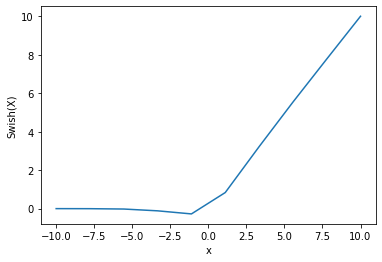

In [74]:
plt.plot(x, z)
plt.xlabel("x")
plt.ylabel("Swish(X)")
plt.show();